In [1]:
import wisps

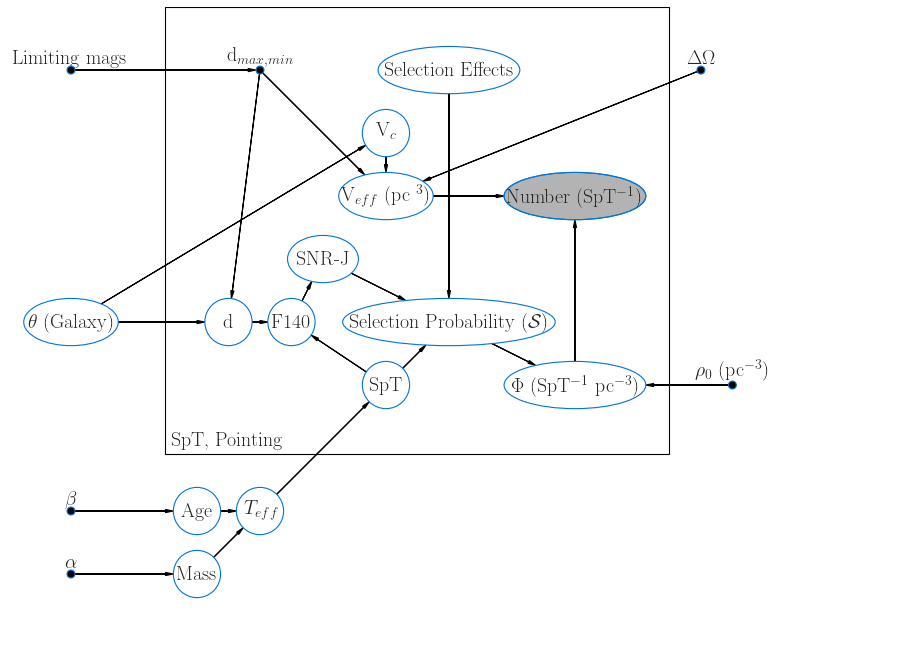

In [2]:
from matplotlib import rc


import daft

# Colors.
p_color = {"ec": "#2ECC40"}
s_color = {"ec": "#0074D9"}

pgm = daft.PGM(shape=[14, 10], origin=[0.0, 0.0], node_unit=1.5)

#mass age spt stuff
n = daft.Node("alpha", r"$\alpha$", 1, 1, plot_params=s_color, fixed=True )
pgm.add_node(n)
pgm.add_node(daft.Node("beta",  r"$\beta$", 1,2 , plot_params=s_color, fixed=True))

pgm.add_node(daft.Node("mass",  r"Mass", 3,1 , plot_params=s_color, fixed=False))
pgm.add_node(daft.Node("age",  r"Age", 3,2 , plot_params=s_color, fixed=False))

pgm.add_node(daft.Node("teff",  r"$T_{eff}$", 4,2 , plot_params=s_color, fixed=False))
pgm.add_node(daft.Node("spt",  r"SpT", 6, 4 , plot_params=s_color, fixed=False))

#distance stuff 
pgm.add_node(daft.Node("theta",  r"$\theta$ (Galaxy)", 1,5 , plot_params=s_color, fixed=False, aspect=2.))

#solid angle
pgm.add_node(daft.Node("solid_angle",  r"$\Delta \Omega$", 11,9 , plot_params=s_color, fixed=True))

#fixed maglimits

pgm.add_node(daft.Node("mag_faint",  r"Limiting mags", 1,9 , plot_params=s_color, fixed=True))


pgm.add_node(daft.Node("d_max",  r"d$_{max, min}$", 4.,9 , plot_params=s_color, fixed=True, aspect=1.))

pgm.add_node(daft.Node("volume",  r"V$_{eff}$ (pc $^3$)", 6,7. , plot_params=s_color, fixed=False, aspect=2.))
pgm.add_node(daft.Node("volume_c",  r"V$_c$", 6.,8., plot_params=s_color, fixed=False))

#distance stuff 
pgm.add_node(daft.Node("distance",  r"d", 3.5,5 , plot_params=s_color, fixed=False))

#add selection effects stuff
pgm.add_node(daft.Node("F140",  r"F140", 4.5,5 , plot_params=s_color, fixed=False))
pgm.add_node(daft.Node("snrj",  r"SNR-J", 5,6 , plot_params=s_color, fixed=False, aspect=1.5))

#selection eff
pgm.add_node(daft.Node("sel_effects",  r"Selection Effects", 7,9 , plot_params=s_color, fixed=False, aspect=3.))
pgm.add_node(daft.Node("sel_probability",  r"Selection Probability $(\mathcal{S})$", 7,5 , plot_params=s_color, fixed=False, aspect=4.5))


#luminosity function
pgm.add_node(daft.Node("phi",  r"$\Phi$ (SpT$^{-1}$ pc$^{-3})$", 9,4 , plot_params=s_color, fixed=False, aspect=3.))

#local density
pgm.add_node(daft.Node('rho0',  r"$\rho_0$ (pc$^{-3})$", 11.5,4 , plot_params=s_color, fixed=True))

#number density
pgm.add_node(daft.Node('number',  r"Number (SpT$^{-1})$", 9.,7 , plot_params=s_color, fixed=False, observed=True, aspect=3.))

# Edges.
pgm.add_edge("alpha", "mass")
pgm.add_edge("beta", "age")

pgm.add_edge("mass", "teff")
pgm.add_edge("age", "teff")

pgm.add_edge( "mag_faint", "d_max",)

pgm.add_edge("theta", "volume_c")
#pgm.add_edge("h", "volume_c")

pgm.add_edge("volume_c", "volume")
pgm.add_edge("d_max", "volume")
pgm.add_edge("solid_angle", "volume")

pgm.add_edge("theta", "distance")
pgm.add_edge("d_max", "distance")


pgm.add_edge("teff", "spt")
pgm.add_edge("distance", "F140")
pgm.add_edge("spt", "F140")
pgm.add_edge("F140", "snrj")
#pgm.add_edge("spt", "d_max")

pgm.add_edge("sel_effects", "sel_probability")
pgm.add_edge("snrj", "sel_probability")

pgm.add_edge("sel_probability", "phi")
pgm.add_edge("spt", "sel_probability")

pgm.add_edge("rho0", "phi")

pgm.add_edge("volume", "number")
pgm.add_edge("phi", "number")


# And a plate.
pgm.add_plate(daft.Plate([2.5, 3., 8, 7.0], label=r"SpT, Pointing",    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig(wisps.OUTPUT_FIGURES+"/graphical_model.pdf")

